In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
sketches = ["cmoments", "yahoo"]

In [31]:
colormap = {
    "cmoments": "C0",
    "tdigest": "C1",
    "yahoo": "C2",
    "spark_gk": "C3",
    "histogram": "C4",
    "sampling": "C5",
    "approx_histogram": "C6",
}
markers = {
    "cmoments": "x",
    "tdigest": "^",
    "yahoo": "s",
    "spark_gk": "+",
    "histogram": "D",
    "sampling": "o",
    "approx_histogram": "<"
}
alg_display_name = {
    "cmoments": "M-Sketch",
    "tdigest": "T-Digest",
    "yahoo": "Merge12",
    "spark_gk": "GK",
    "histogram": "EW-Hist",
    "sampling": "Sampling",
    "approx_histogram": "S-Hist",
}

In [79]:
m_datasets = ["milan", "hepmass", "exponential"]

In [80]:
cross_paths = {
    "milan": "../finalresults/cross-milan.csv",
    "hepmass": "../finalresults/cross-hepmass.csv",
    "exponential": "../finalresults/cross-exp.csv"
}

In [81]:
cross_results = {}
for dname in m_datasets:
    cross_results[dname] = pd.read_csv(cross_paths[dname])

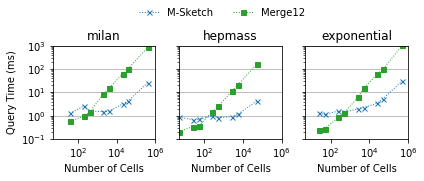

In [90]:
f, axs = plt.subplots(1,len(m_datasets), figsize=(6,2.3), sharey=True)
for di in range(len(m_datasets)):
    dname = m_datasets[di]
    df = cross_results[dname]
    dfg = df[df["trial"] > 0].groupby(["sketch", "n"]).mean()
    ax = axs[di]
    lines = []
    labels = []
    for alg in sketches:
        vals = dfg.loc[alg]
        mtime = vals["merge_time"] * 1e-6
        qtime = vals["query_time"] * 1e-6
        l, = ax.loglog(
            vals.index,mtime + qtime, 
            label=alg_display_name[alg],
            marker=markers[alg],
            color=colormap[alg],
            markersize=5,
            ls="dotted",
            lw=1
        )
        lines.append(l)
        labels.append(alg_display_name[alg])

    ax.set_title(dname)
    ax.set_ylim(.1, 1000)
    if di == 0:
        ax.set_ylabel("Query Time (ms)")
    ax.set_xlabel("Number of Cells")
    ax.set_xlim(5, 10**6)
    ax.yaxis.grid(True)

lgd = f.legend(
    lines, labels,
    bbox_to_anchor=(0.3, 1.00, 1., .102), ncol=2, loc=2,
    frameon=False
)
f.tight_layout()
f.savefig("vary_merge.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

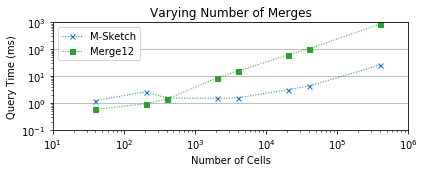

In [53]:
f, axs = plt.subplots(1,len(m_datasets), figsize=(6,3), sharey=True)
for di in range(len(m_datasets)):
    dname = m_datasets[di]
    ax = axs[di]

lines = []
labels = []
for si in range(len(sketches)):
    alg = sketches[si]
    vals = dfg.loc[alg]
    mtime = vals["merge_time"] * 1e-6
    qtime = vals["query_time"] * 1e-6
    l, = ax.loglog(
        vals.index,mtime + qtime, 
        label=alg_display_name[alg],
        marker=markers[alg],
        color=colormap[alg],
        markersize=5,
        ls="dotted",
        lw=1
    )
    lines.append(l)
    labels.append(alg_display_name[alg])

ax.yaxis.grid(True)
ax.set_title("Varying Number of Merges")
ax.set_ylim(.1, 1000)
ax.set_ylabel("Query Time (ms)")
ax.set_xlabel("Number of Cells")
ax.set_xlim(10, 10**6)
# lgd = fig.legend(
#     lines, labels,
#     bbox_to_anchor=(0.05, 1., 1., .102)
# )
lgd=plt.legend()
fig.tight_layout()
fig.savefig("vary_merge.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')